# CSE 6240 Web Search and Text Mining
## Homework 2: Web Networks

This homework asks you to perform network analysis on a real world networks.

In [ ]:
# imports 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import re

## Part 1: Setup and basics [0.5 points]

In this section, we load the network that we will use throughout this assignment. We will use a large web network from Stanford. 
The following cell will download the network in your current directory. If it does not work, please download the zip file from [here](https://snap.stanford.edu/data/web-Stanford.txt.gz) and extract.

In [ ]:
!wget https://snap.stanford.edu/data/web-Stanford.txt.gz
!gzip -d web-Stanford.txt.gz

--2023-02-07 01:19:49--  https://snap.stanford.edu/data/web-Stanford.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8908378 (8.5M) [application/x-gzip]
Saving to: ‘web-Stanford.txt.gz’

web-Stanford.txt.gz 100%[===================>]   8.50M  2.85MB/s    in 3.0s    

2023-02-07 01:19:52 (2.85 MB/s) - ‘web-Stanford.txt.gz’ saved [8908378/8908378]



This Stanford web network can be described as follows:

- A node in the network represents a web page
- An edge (directed) represents a hyperlink between web pages

There is other information related to the nodes in the data you just downloaded, but for the purposes of this assignment we will ignore it.

Let's take a quick peek at the network data.

In [ ]:
! head -n 10 web-Stanford.txt

# Directed graph (each unordered pair of nodes is saved once): web-Stanford.txt 
# Stanford web graph from 2002
# Nodes: 281903 Edges: 2312497
# FromNodeId	ToNodeId
1	6548
1	15409
6548	57031
15409	13102
2	17794
2	25202


### 1.1 Load Network [0.1 points]

We can see here that this is a directed graph. Let's build one using `networkx` now. Keep in mind two things: (1) the extra lines at the top of the file and (2) the data is tab separated. Initialize the graph as a `networkx` directed graph.


In [ ]:
def load_net (filename):
  """
  Arguments
  ---------
  filename (str): The name of the file which 
  contains the edge data.

  Returns
  -------
  networkx.DiGraph
  """

  #net = None
   ## Add code below to build the graph ##
  net = nx.DiGraph()
  file = open(filename, mode='r')
  lines = file.readlines()

  for i in range(4, len(lines)):
    row = lines[i]
    e = row.split('\t')
    net.add_edge(e[0], e[1][:-1])

  #################################
  return net

In [ ]:
net = load_net ('web-Stanford.txt')

### 1.2 Calculate network properties [0.4 points]

Here you'll use `networkx` functions to calculate for a few network statistics: \

*   Number of nodes in the network
*   Number of edges in the network
*   Number of nodes in the largest weakly connected component
*   Number of nodes in the largest strongly connected component   


In [ ]:
def print_network_statistics (net):
  """
  Arguments
  ---------
  net (networkx.Graph): The network whose 
  statistics are to be printed.

  Return
  ------
  None
  """
  num_nodes = None
  num_edges = None
  nodes_in_largest_strong_component = None
  nodes_in_largest_weak_component = None
  
  ## Add code to compute the network statistics ##
  num_nodes = net.number_of_nodes()
  num_edges = net.number_of_edges()
  
  largest_weak_comp = max(nx.weakly_connected_components(net),key=len)
  nodes_in_largest_weak_component = len(largest_weak_comp)

  largest_strong_comp = max(nx.strongly_connected_components(net),key=len)
  nodes_in_largest_strong_component = len(largest_strong_comp)

  #############################################################

  ##### DO NOT MODIFY THIS SECTION -- SANITY CHECK #####
  print (f'=== Network statistics: SANITY CHECK ===')

  print (f'Number of nodes in the network: {num_nodes}, {num_nodes == 281903}') 
  print (f'Number of edges in the network: {num_edges}, {num_edges == 2312497}')  
  print (f'Number of nodes in the largest strongly connected component: {nodes_in_largest_strong_component}, {nodes_in_largest_strong_component == 150532}')  
  print (f'Number of nodes in the largest weakly connected component: {nodes_in_largest_weak_component}, {nodes_in_largest_weak_component == 255265}')  

  print (f'======')

In [ ]:
# RUN THIS CELL TO SEE SANITY CHECK
print_network_statistics(net)

=== Network statistics: SANITY CHECK ===
Number of nodes in the network: 281903, True
Number of edges in the network: 2312497, True
Number of nodes in the largest strongly connected component: 150532, True
Number of nodes in the largest weakly connected component: 255265, True


## Part 2: Strongly Connected Components [1.5 points]

As we saw in class, finding the SCC that a node is a part found by findng the intersection of OUT(A, G) and IN(A, G). You will implement that here.

## 2.1 Finding the SCC of nodes

The steps to finding the SCC of a node are to:


1.   Find the set $IN(A, G)$
2.   Find the set $OUT(A, G)$
3.   Find the intersection of $IN(A, G)$ and $OUT(A, G)$


### Step 1: Find the set of nodes going 'into' a node. [0.2 points]




In [ ]:
def find_in_node (node, net):
  """
  Arguments
  ---------
  node (str): the id of node we're finding the SCC for
  net (networkx.Graph): the Stanford network we loaded earlier

  Returns
  -------
  node_in (list): list of nodes that can reach 'node'
  """
  node_in = []
  ## Add code below ##

  # in_edges = net.in_edges(node)
  # for i in in_edges:
  #   node_in.append(i[0])


  node_in = list(nx.shortest_path(net.reverse(), node).keys())
  
  #################################
  return node_in

### Step 2: Find the set of nodes going 'out of' a node. [0.2 points]

In [ ]:
def find_out_node (node, net):
  """
  Arguments
  ---------
  node (str): the id of node we're finding the SCC for
  net (networkx.Graph): the Stanford network we loaded earlier

  Returns
  -------
  node_out (list): list of nodes that can be reached from 'node'
  """
  node_out = None
  ## Add code below ##
  node_out = list(nx.shortest_path(net, node).keys())

  #################################
  return node_out

### Step 3: Use the code above to get the SCC for a node. [0.2 points]

In [ ]:
def get_scc (node, net):
  """
  Arguments
  ---------
  node (str): the id of node we're finding the SCC for
  net (networkx.Graph): the Stanford network we loaded earlier

  Returns
  -------
  scc (list): set of nodes in the scc of 'node'
  """
  #scc = []
  ## Add code below ##
  in_nodes = find_in_node(node, net)
  out_nodes = find_out_node(node, net)

  scc = list(set(in_nodes) & set(out_nodes))

  #################################]
  return scc

Sanity check: find some SCCs.



In [ ]:
## DO NOT MODIFY -- SANITY CHECK ##
print(f'Number of nodes in SCC of node 45087: {len(get_scc(str(45087), net))},  {len(get_scc(str(45087), net)) == 150532}')
print(f'Number of nodes in SCC of node 2: {len(get_scc(str(2), net))},  {len(get_scc(str(2), net)) == 150532}')

Number of nodes in SCC of node 45087: 150532,  True
Number of nodes in SCC of node 2: 150532,  True


### 2.2 Distribution Visualization [0.9 points]

We saw an $IN(v)$ distribution graph in class. This type of visualization shows us the number of nodes reached by percentage of starting nodes in networks.

Using the function `find_out_node`, create a distribution plot (using out-links only) with the fraction of starting nodes as the x-axis and the number of nodes reached as the y-axis (reference slide 23 on web-networks.pdf on Canvas to see an example).

To decrease runtime, do this for the first **100** nodes in the network. Return your x-axis and y-axis values.

Some hints: (1) the plot should plateau when the number of nodes reached hits the number of nodes in the network, (2) since the first few nodes are in the largest SCC, the number of nodes reached in the plot should shoot up very quickly

In [ ]:
def plot_in_distribution(net):
  """
  Arguments
  ---------
  net (networkx.Graph): the Stanford network we loaded earlier
  """ 
  # Note: sort the list of nodes (by node id, in ascending order) before iterating over them 
  frac_nodes = []
  nodes_reached = []
  ## Add code below ## 

  #nodes = list(net.nodes)[0:10]
  num_nodes = net.number_of_nodes()
  nodes_int = sorted([int(i) for i in net.nodes])
  nodes = [str(i) for i in nodes_int[0:100]]

  reached_nodes = set(find_out_node(nodes[0], net))

  for n in range(len(nodes)):
    n_reaches_nodes = find_out_node(nodes[n], net)
    reached_nodes = reached_nodes.union(set(n_reaches_nodes))
    
    ## check for path to self
    if nx.has_path(net, nodes[n], nodes[n]):
      new_nodes_reached = len(reached_nodes)-1
    else:
      new_nodes_reached = len(reached_nodes)
    
    ## append the min(nodes reached, total number of nodes)
    if n == 0:
      nodes_reached.append(new_nodes_reached)
    else:
      nodes_reached.append(min(nodes_reached[n-1] + new_nodes_reached, num_nodes))
    
    frac_nodes.append(n / num_nodes) 

  
  ####################
  return frac_nodes, nodes_reached

In [ ]:
# Plot the distribution by running this cell-- Note: may take 2-3 minutes to compute, so be aware of that when debugging
frac_nodes, nodes_reached = plot_in_distribution(net)

NOTE: I changed the following sanity check based on the announcement made on this question as well as the piazza post. I accepted duplicates and excluded self-paths when counting nodes reached

In [ ]:
## DO NOT MODIFY -- SANITY CHECK ##


frac_tf = np.isclose([0.00000000e+00, 3.54731947e-06, 7.09463894e-06, 1.06419584e-05,
       1.41892779e-05, 1.77365973e-05, 2.12839168e-05, 2.48312363e-05,
       2.83785557e-05, 3.19258752e-05, 3.54731947e-05, 3.90205141e-05,
       4.25678336e-05, 4.61151531e-05, 4.96624726e-05, 5.32097920e-05,
       5.67571115e-05, 6.03044310e-05, 6.38517504e-05, 6.73990699e-05,
       7.09463894e-05, 7.44937088e-05, 7.80410283e-05, 8.15883478e-05,
       8.51356672e-05, 8.86829867e-05, 9.22303062e-05, 9.57776256e-05,
       9.93249451e-05, 1.02872265e-04, 1.06419584e-04, 1.09966904e-04,
       1.13514223e-04, 1.17061542e-04, 1.20608862e-04, 1.24156181e-04,
       1.27703501e-04, 1.31250820e-04, 1.34798140e-04, 1.38345459e-04,
       1.41892779e-04, 1.45440098e-04, 1.48987418e-04, 1.52534737e-04,
       1.56082057e-04, 1.59629376e-04, 1.63176696e-04, 1.66724015e-04,
       1.70271334e-04, 1.73818654e-04, 1.77365973e-04, 1.80913293e-04,
       1.84460612e-04, 1.88007932e-04, 1.91555251e-04, 1.95102571e-04,
       1.98649890e-04, 2.02197210e-04, 2.05744529e-04, 2.09291849e-04,
       2.12839168e-04, 2.16386488e-04, 2.19933807e-04, 2.23481126e-04,
       2.27028446e-04, 2.30575765e-04, 2.34123085e-04, 2.37670404e-04,
       2.41217724e-04, 2.44765043e-04, 2.48312363e-04, 2.51859682e-04,
       2.55407002e-04, 2.58954321e-04, 2.62501641e-04, 2.66048960e-04,
       2.69596280e-04, 2.73143599e-04, 2.76690919e-04, 2.80238238e-04,
       2.83785557e-04, 2.87332877e-04, 2.90880196e-04, 2.94427516e-04,
       2.97974835e-04, 3.01522155e-04, 3.05069474e-04, 3.08616794e-04,
       3.12164113e-04, 3.15711433e-04, 3.19258752e-04, 3.22806072e-04,
       3.26353391e-04, 3.29900711e-04, 3.33448030e-04, 3.36995349e-04,
       3.40542669e-04, 3.44089988e-04, 3.47637308e-04, 3.51184627e-04,
       ], frac_nodes, atol=0.0000001).all()
reached_tf = nodes_reached == [    28,     218076, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903, 281903, 281903, 281903, 281903,
       281903, 281903, 281903, 281903]


print(f'Fraction of nodes list passes test: {frac_tf}')
print(f'Nodes reached list passes test: {reached_tf}')

Fraction of nodes list passes test: True
Nodes reached list passes test: True


## Part 3: Supernode Graphs [3.5 points]

Now that we've played around with finding the SCCs of individual nodes, we're ready to do it at scale. \

In a large network, each of its SCCs can be represented by one **supernode**. Those SCCs can then be represented in a new, smaller graph called a **supernode graph**.  This can significantly decrease the size of a network and make visualizing it much simpler. It can also make categorizing relationships between nodes more straightforward. \

In the below functions, you'll create a supernode graph from a college messaging network. You can do this by (1) initializing a new graph, (2) finding the connected components of each node in the email network, (3) sorting those nodes by id, and (4) creating a supernode in the graph out of each connected component (you can do this by **contracting** the sorted list of nodes into the first (smallest) node in the connected component. This means that for each supernode in the graph, it's label will be given by the node with the smallest id in its SCC). 

Feel free to use `networkx` functions or your own logic to complete this section.

Hint: supernodes can only be created from undirected graphs.

### 3.1 Load a new network [1 point]

We'll first load a smaller messaging network to build and do this with.

In [ ]:
!wget https://snap.stanford.edu/data/CollegeMsg.txt.gz
!gzip -d CollegeMsg.txt.gz

--2023-02-07 01:25:08--  https://snap.stanford.edu/data/CollegeMsg.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345339 (337K) [application/x-gzip]
Saving to: ‘CollegeMsg.txt.gz’

CollegeMsg.txt.gz   100%[===================>] 337.25K   474KB/s    in 0.7s    

2023-02-07 01:25:09 (474 KB/s) - ‘CollegeMsg.txt.gz’ saved [345339/345339]



The edge data in this college messaging dataset is formatted as such (note that it is space-separated): \


```
source_node target_node timestamp
```

For the purposes of this assignment, we'll only need node and edge data (you can ignore the timestamps).



In [ ]:
def load_data(filename):
  """
  Arguments
  ---------
  filename (str): The name of the file which 
  contains the edge data.

  Returns
  -------
  networkx.Graph 
  """

  small_net = None
  ## Add code below  ##
  small_net = nx.Graph()
  file = open(filename, mode='r')
  lines = file.readlines()
  
  for i in range(len(lines)):
    row = lines[i]
    e = row.split(' ')
    small_net.add_edge(e[0], e[1])
  

  #################################

  return small_net

In [ ]:
# Load the network by running this cell
small_net = load_data('CollegeMsg.txt')

In [ ]:
## DO NOT MODIFY -- SANITY CHECK ##
# Let's check the number of nodes and edges in the graph to make sure we loaded it correctly 
print(f'Number of nodes in the messaging network: {len(small_net.nodes())}, {len(small_net.nodes()) == 1899}')
print(f'Number of nodes in the messaging network: {len(small_net.edges())}, {len(small_net.edges()) == 13838}')

Number of nodes in the messaging network: 1899, True
Number of nodes in the messaging network: 13838, True


### 3.2 Conversion to Supernode Graph [2 points]

In the function below, write a function to create a supernode graph from the graph we just built.


*   A node should be an $SCC$ in the graph small_net
*   An edge should be a link between $SCC$s in the graph `small_net`

Hint: When initializing `supernode_graph`, you should create a copy of `small_net`.



In [ ]:
def to_supernode(small_net):
  """
  Arguments
  ---------
  small_net (networkx.Graph): the messaging network we loaded earlier

  Returns
  -------
  supernode_graph (networkx.Graph): new supernode graph
  """
  supernode_graph = small_net
  ## Add code below ##

  #find SCCs
  all_scc = list(nx.connected_components(supernode_graph))
  
  #contract nodes in each scc
  for supernode in all_scc:
    nodes = sorted(list(supernode))
    for n in nodes[1:]:
        supernode_graph = nx.contracted_nodes(supernode_graph, nodes[0], n, self_loops=False)  
 
  
  #################################

  return supernode_graph

In [ ]:
# Create the supernode graph by runnning this cell-- Note: may take 2-3 minutes to compute, so be aware of that when debugging
supernode_graph = to_supernode(small_net)

NOTE: I modified the following sanity check based on the Canvas announcement that was made.

In [ ]:
## DO NOT MODIFY -- SANITY CHECK ##
# Let's check the number of nodes and edges in the graph to make sure we loaded it correctly 
print(f'Number of nodes in the supernode graph: {len(supernode_graph.nodes())}, {len(supernode_graph.nodes()) == 4}')
print(f'Number of egdes in the supernode graph: {len(supernode_graph.edges())}, {len(supernode_graph.edges()) == 0}')

Number of nodes in the supernode graph: 4, True
Number of egdes in the supernode graph: 0, True


### 3.3 Visualization [0.5 point]

Visualize the new supernode graph and write a few sentences about it. Answers should include:



*   Number of nodes
*   Number of edges
*   Observations of the graph's shape
*   Why the graph might look the way it does
*   What each supernode represents

Answer (write in this cell):
There are 4 supernodes, each containing some connection of smaller nodes.

There are 0 edges between the supernodes.

The graph is just 4 separate nodes with no edge to connect them. This is because if the nodes were connected by an edge in any ways, they would cease to be individual supernodes.

Each supernode represents a cluster of students in the data who have either received/sent a text to someone, who also received/sent a text to someone else, etc. The only way two of the original nodes would NOT be connected to the giant supernode is if two people only text each other. Basically, mostly everyone knows/texts everyone.

Use the draw tool from `networkx` to visualize your network. 

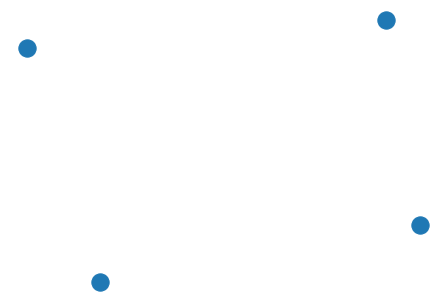

In [ ]:
## ADD CODE BELOW ##
nx.draw(supernode_graph)
########################

### Section 4: Web Graph Connectivity [1 point]

Recall the Web graph’s Bowtie Structure shown in the class slides.

The web graph is directed and has three major components: $IN, SCC$, and $OUT$. The nodes in the Strongly Connected Component ($SCC$) can reach each other and can be reached from any node in $IN$. Nodes in the $SCC$ can reach any node in $OUT$.

\* For this question, we will ignore the presence of **TENDRILS**, **TUBES**, and
**DISCONNECTED** components.

Question:

- You randomly select two nodes $A$ and $B$ from the web graph with replacement. What is the probability that you can follow outgoing edges starting from node $A$ to reach node $B$? In this case, $A$ and $B$ could be same because of replacement. \\

 The size of $IN$, $SCC$, and $OUT$ components are represented as $|IN|$, $|SCC|$, $|OUT|$ respectively. Let the total number of nodes in the entire graph be $N (= |IN| + |SCC| + |OUT|)$. \\

 Assume the probability of a node in $IN$ reaching another node in $IN$ is $\alpha$. Similarly, the probability of a node in $OUT$ reaching another node in $OUT$ is $\beta$. 



Answer (write answer in this cell)

There are nine combinations of A and B if we randomly select two nodes from the web graph with replacement. I will be calculating the probabilities using the following equation:

P(A and B are chose and A reaches B) = P(A is in IN, OUT, or SCC) * P(B is in IN, OUt, or SCC) * P(A reaches B)

1. P(A = IN, B = IN, A reaches B) = $\frac{|IN|}{N}$ * $\frac{|IN|}{N} * α$

2. P(A = IN, B = OUT, A reaches B) = $\frac{|IN|}{N}$ * $\frac{|OUT|}{N} * 1$

3. P(A = IN, B = SCC, A reaches B) = $\frac{|IN|}{N}$ * $\frac{|SCC|}{N} * 1$

4. P(A = SCC, B = IN, A reaches B) = $\frac{|SCC|}{N}$ * $\frac{|IN|}{N} * 0 = 0$

5. P(A = SCC, B = SCC, A reaches B) = $\frac{|SCC|}{N}$ * $\frac{|SCC|}{N} * 1$

6. P(A = SCC, B = OUT, A reaches B) = $\frac{|SCC|}{N}$ * $\frac{|OUT|}{N} * 1$

7. P(A = OUT, B = IN, A reaches B) = $\frac{|OUT|}{N}$ * $\frac{|IN|}{N} * 0 = 0$

8. P(A = OUT, B = SCC, A reaches B) = $\frac{|OUT|}{N}$ * $\frac{|SCC|}{N} * 0 = 0$

9. P(A = OUT, B = OUT, A reaches B) = $\frac{|OUT}{N}$ * $\frac{|OUT|}{N} * β $

Summing up all of these nine cases, we get 

$$\frac{|IN|^2α + |IN||OUT| + |IN||SCC| + |SCC|^2 + |SCC||OUT| + |OUT|^2 β}{N^2}$$



